In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
voxels_filepath = '/home/user/Documents/workspace/outputs/voxelstrace_case_1_1_1_keep_Jul_19_2020_16:22:21.csv'
memory_filepath = '/home/user/Documents/workspace/outputs/memorytrace_case_1_1_1_keep_Jul_19_2020_16:22:21.csv'

In [3]:
vox_data = pd.read_csv(voxels_filepath)
vox_data.head()

,nb_voxels
0,85750000
1,101185000
2,116620000
3,132055000
4,120050000


In [4]:
print(len(vox_data.index))

65


In [5]:
vox_data = vox_data.apply(lambda x: x*2/1000000, axis=1)
vox_data.head(15)

,nb_voxels
0,171.50
1,202.37
2,233.24
3,264.11
4,240.10
5,270.97
6,301.84
7,332.71
8,308.70
9,339.57


In [6]:
mem_data = pd.read_csv(memory_filepath)
mem_data.head()

,ram,swap
0,3389.308594,1.25
1,3389.222656,1.25
2,3470.027344,1.25
3,3580.609375,1.25
4,3520.777344,1.25


In [7]:
mem_data = mem_data.apply(np.round, axis=1)
mem_data.head()

,ram,swap
0,3389.0,1.0
1,3389.0,1.0
2,3470.0,1.0
3,3581.0,1.0
4,3521.0,1.0


In [8]:
start_ram = mem_data.iloc[0][0]
mem_data['ram'] = mem_data['ram'].apply(lambda x: x - start_ram)
mem_data.head()

,ram,swap
0,0.0,1.0
1,0.0,1.0
2,81.0,1.0
3,192.0,1.0
4,132.0,1.0


[Text(0, 0.5, 'RAM used (MB)'), Text(0.5, 0, 'time (5s interval)')]

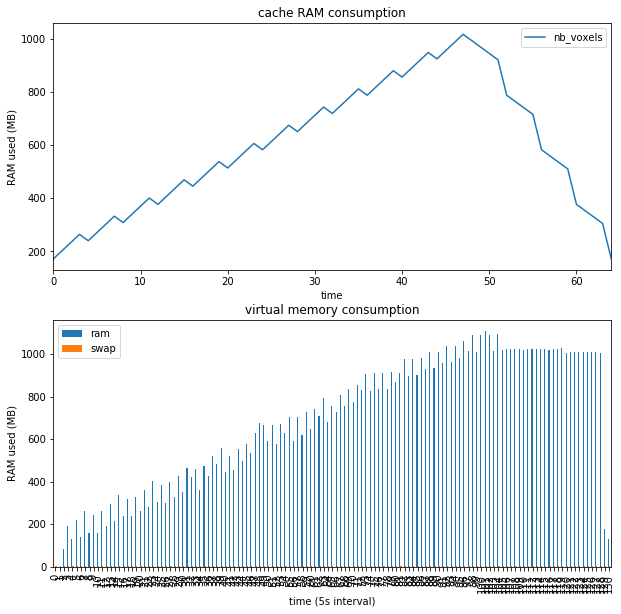

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), sharex=True)
plt.subplot(2,1,1)
vox_data.plot(title='cache RAM consumption', ax=plt.gca())
plt.gca().set(xlabel='time', ylabel='RAM used (MB)')
mem_data.plot(title='virtual memory consumption', ax=axes[1], kind='bar')
axes[1].set(xlabel='time (5s interval)', ylabel='RAM used (MB)')